In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

import os
%config InlineBackend.figure_format = 'retina'

# для генерации рядов на основе данных
from synthetic_module import SyntheticDataGenerator

In [2]:
# returns
crypto_val = pd.read_csv("crypto_values_close.csv")
# returns = pd.read_csv("returns_crypto.csv")
crypto_val['Date'] = pd.to_datetime(crypto_val.Date).dt.date
crypto_val.head(2)

,Date,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,DOGE-USD,ADA-USD,TRX-USD,LINK-USD,...,RVN-USD,TRAC-USD,SC-USD,ELF-USD,QTUM-USD,BAT-USD,LRC-USD,DASH-USD,DCR-USD,GAS-USD
0,2018-06-11,6906.919922,533.283997,1.00193,15.3835,0.604066,0.003234,0.181280,0.048829,0.262975,...,0.024359,0.154359,0.014462,0.793171,11.9838,0.233626,0.417903,271.809998,95.457001,15.3696
1,2018-06-12,6582.359863,496.842987,1.00077,15.2262,0.562933,0.003089,0.166585,0.043982,0.228636,...,0.023065,0.136330,0.012874,0.696955,11.2964,0.208202,0.364944,261.115997,86.651802,14.2886


### Тестовые генерации для ряда биткоина и эфириума

In [3]:
# coins = list(crypto_val.drop(columns='Date').columns)
coins = ['BTC-USD','ETH-USD']

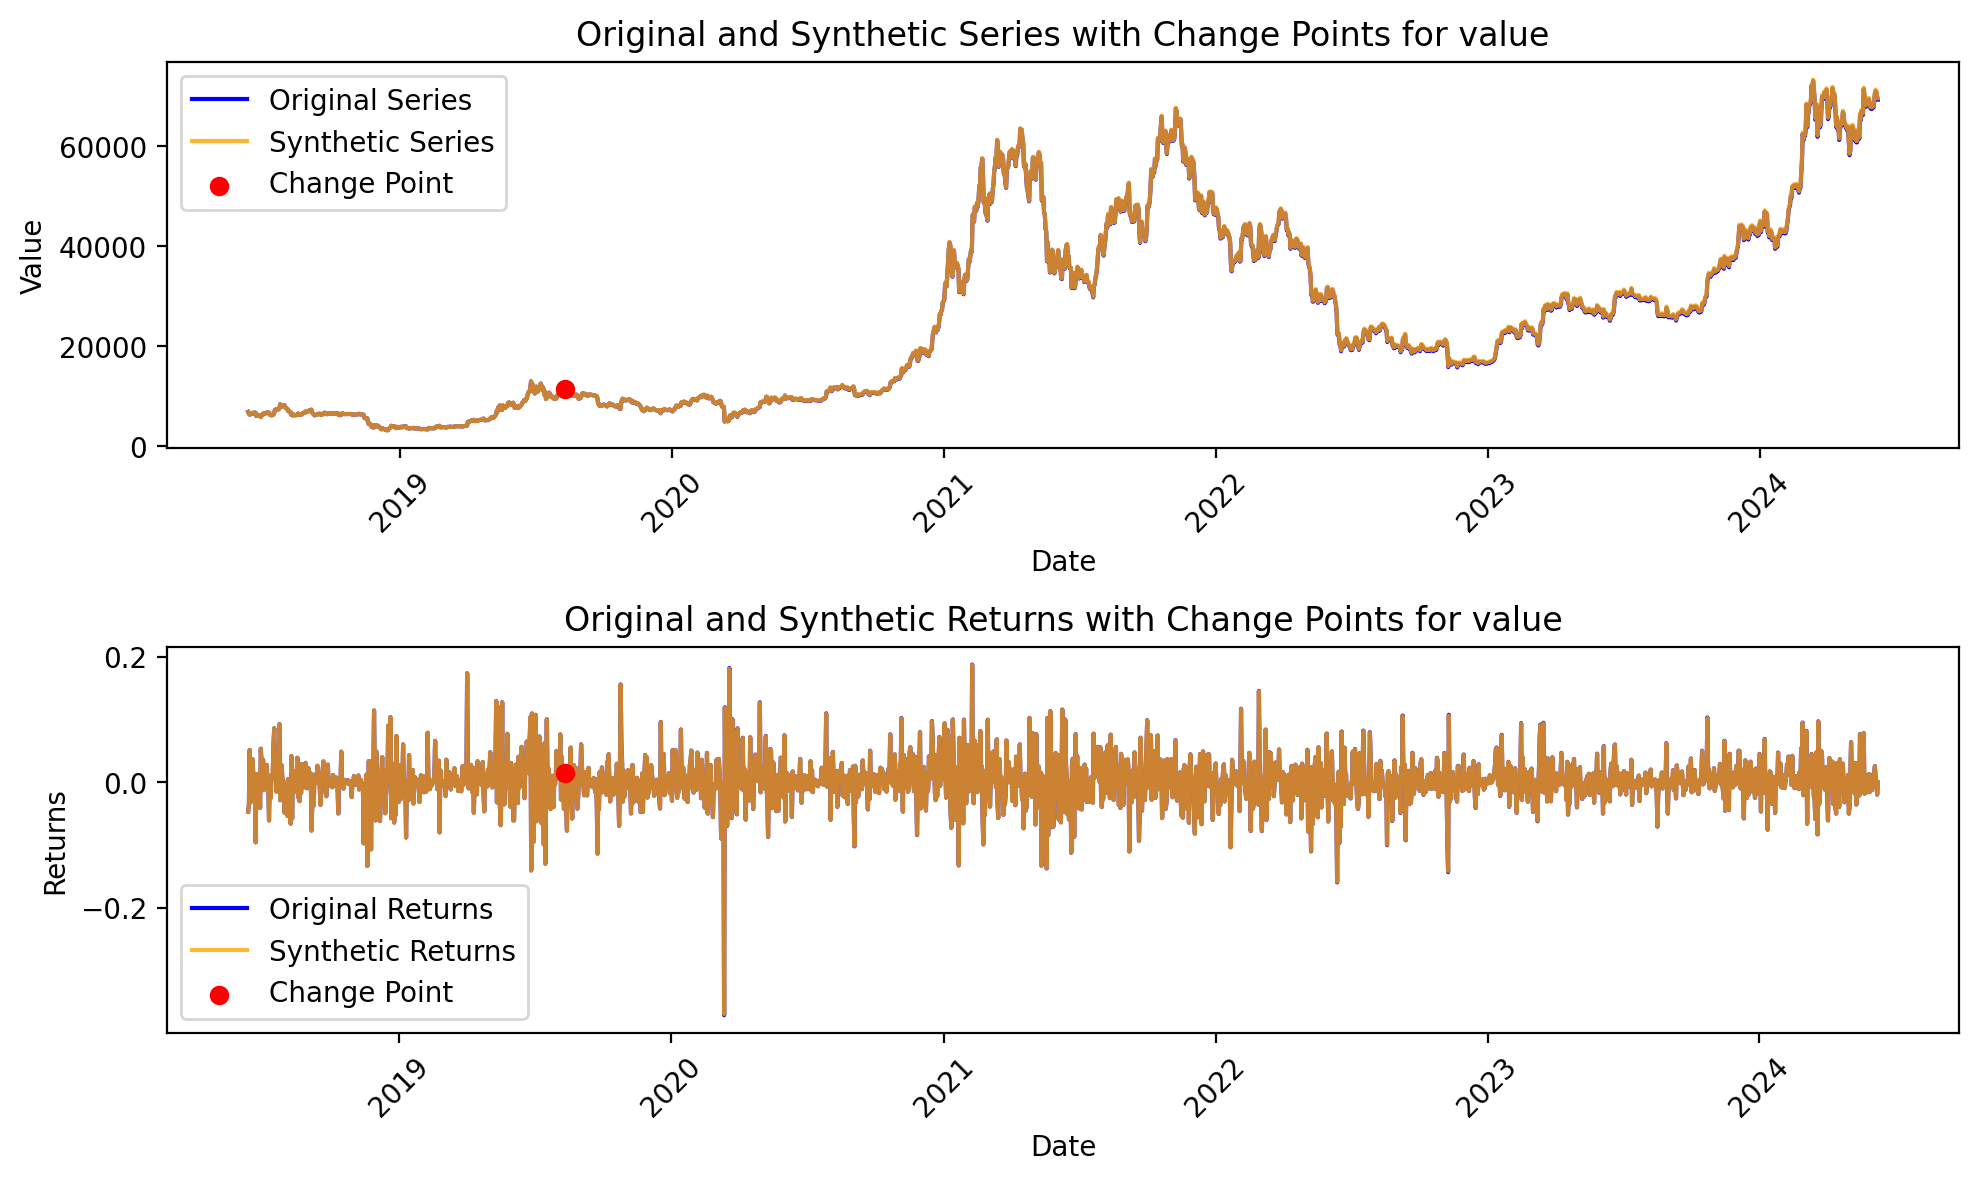

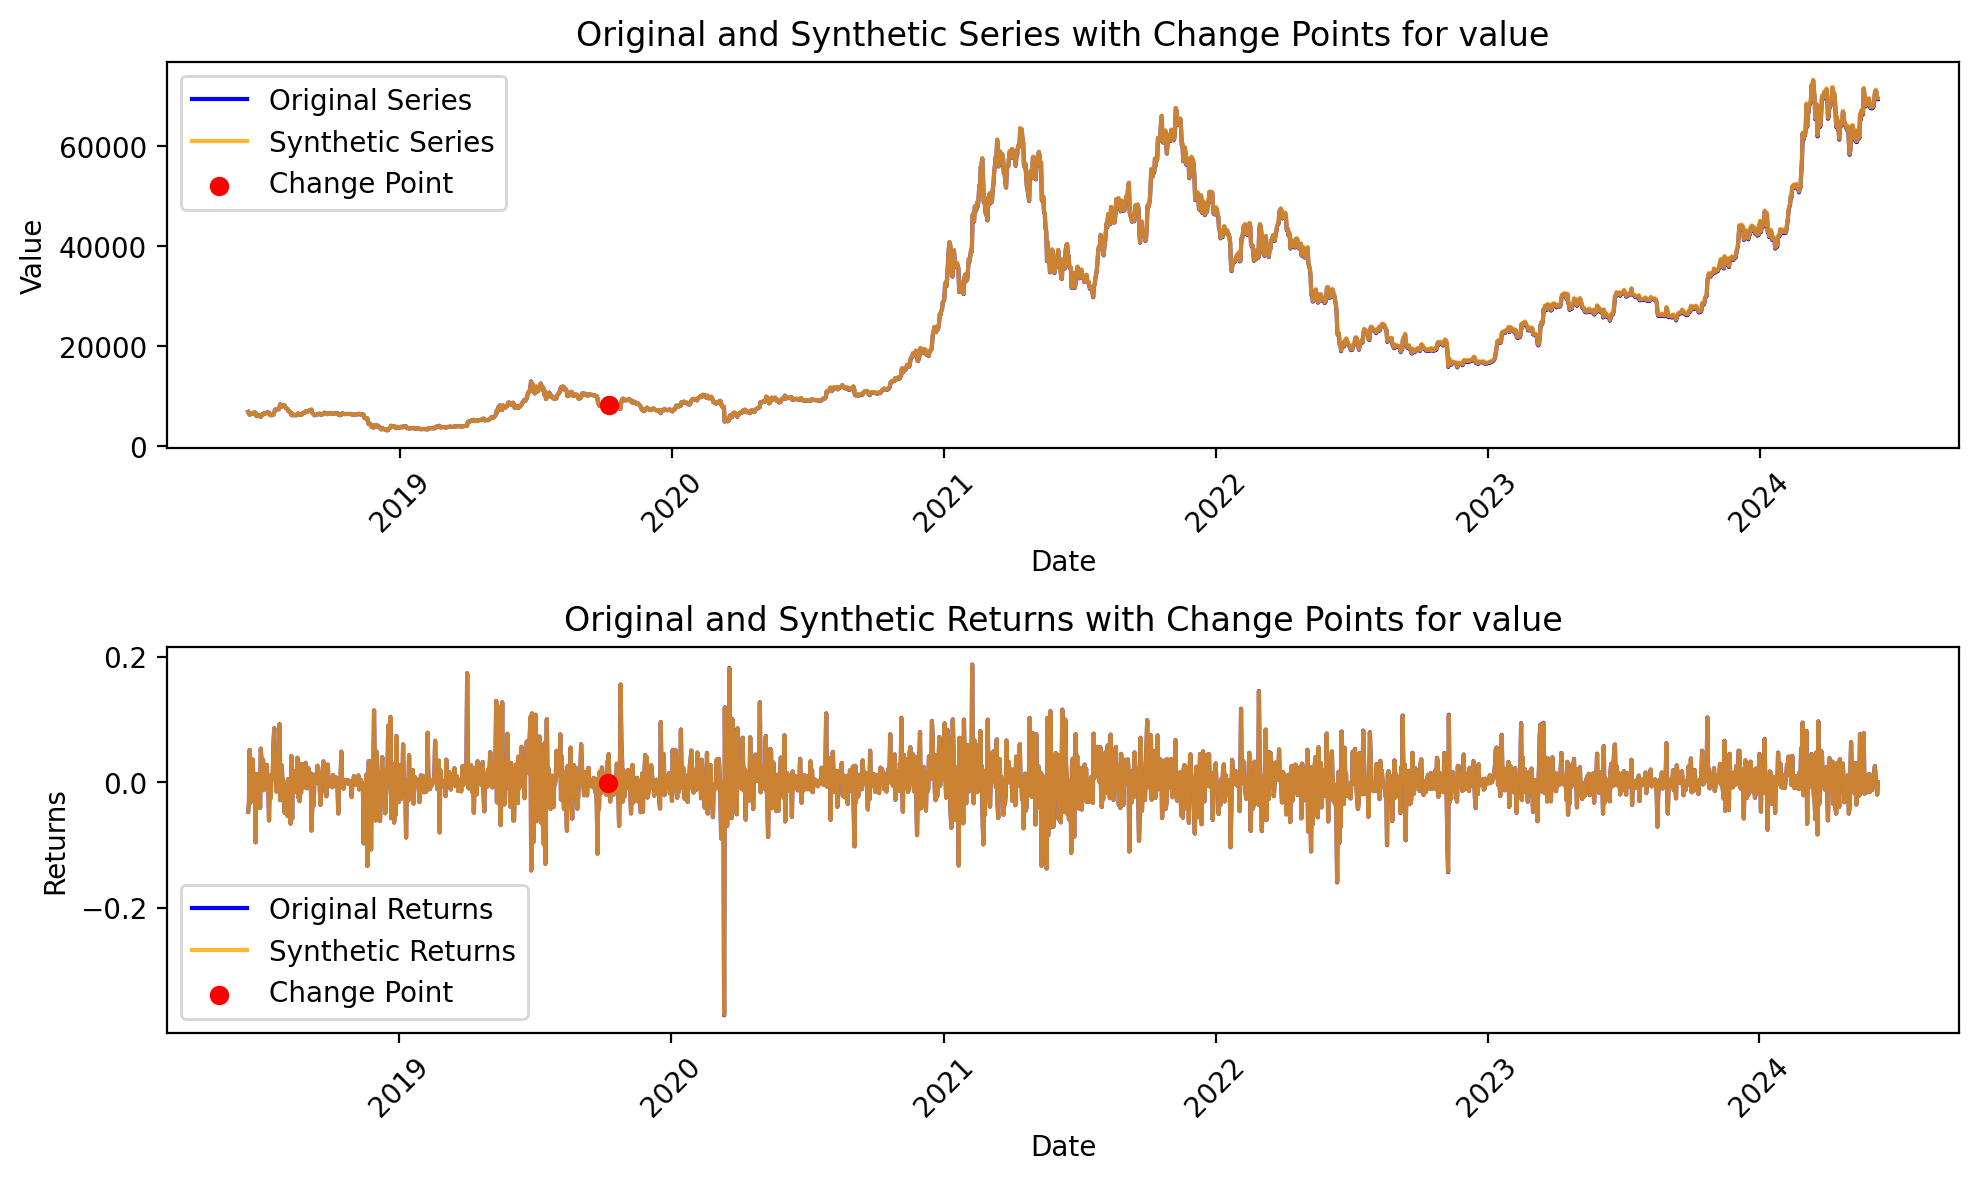

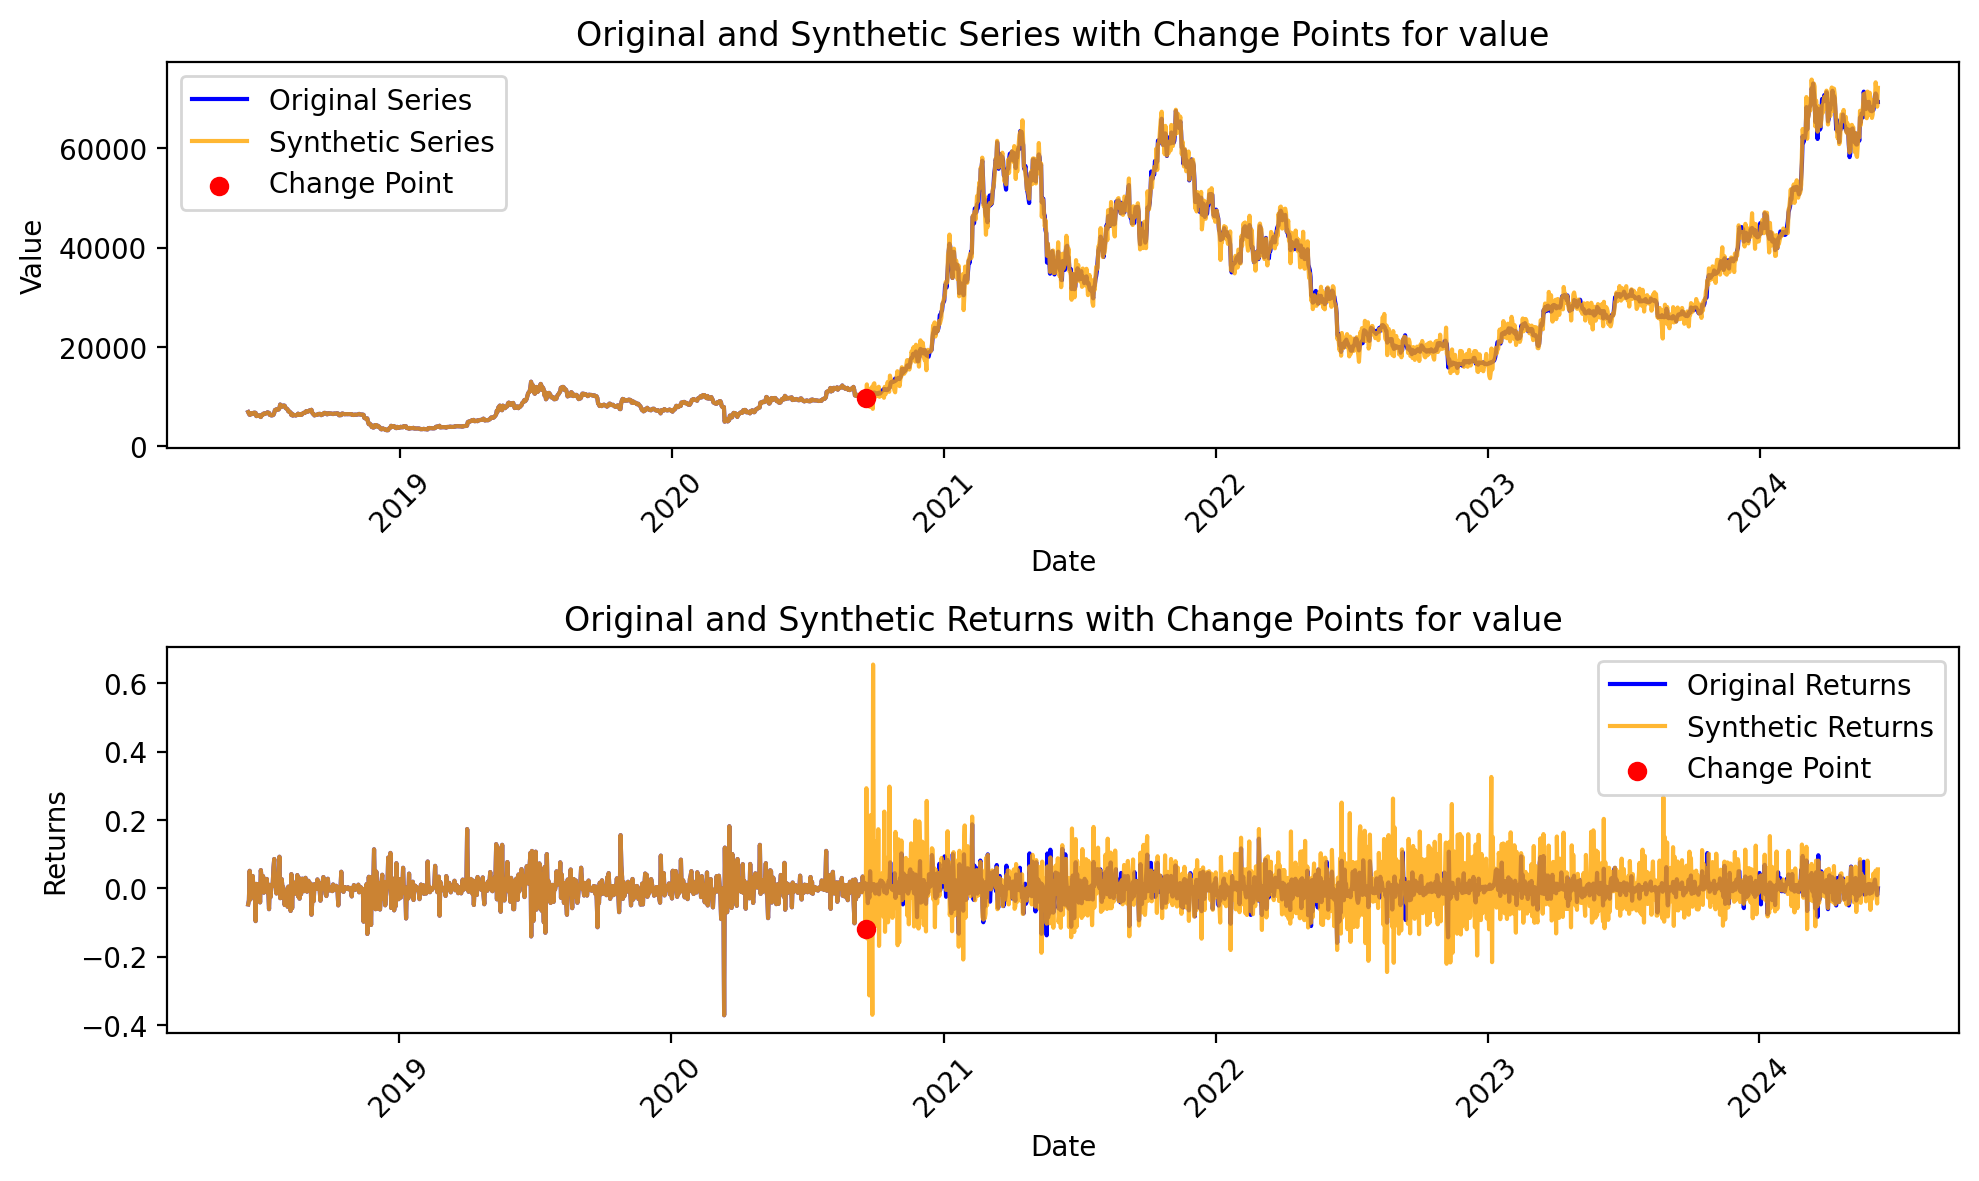

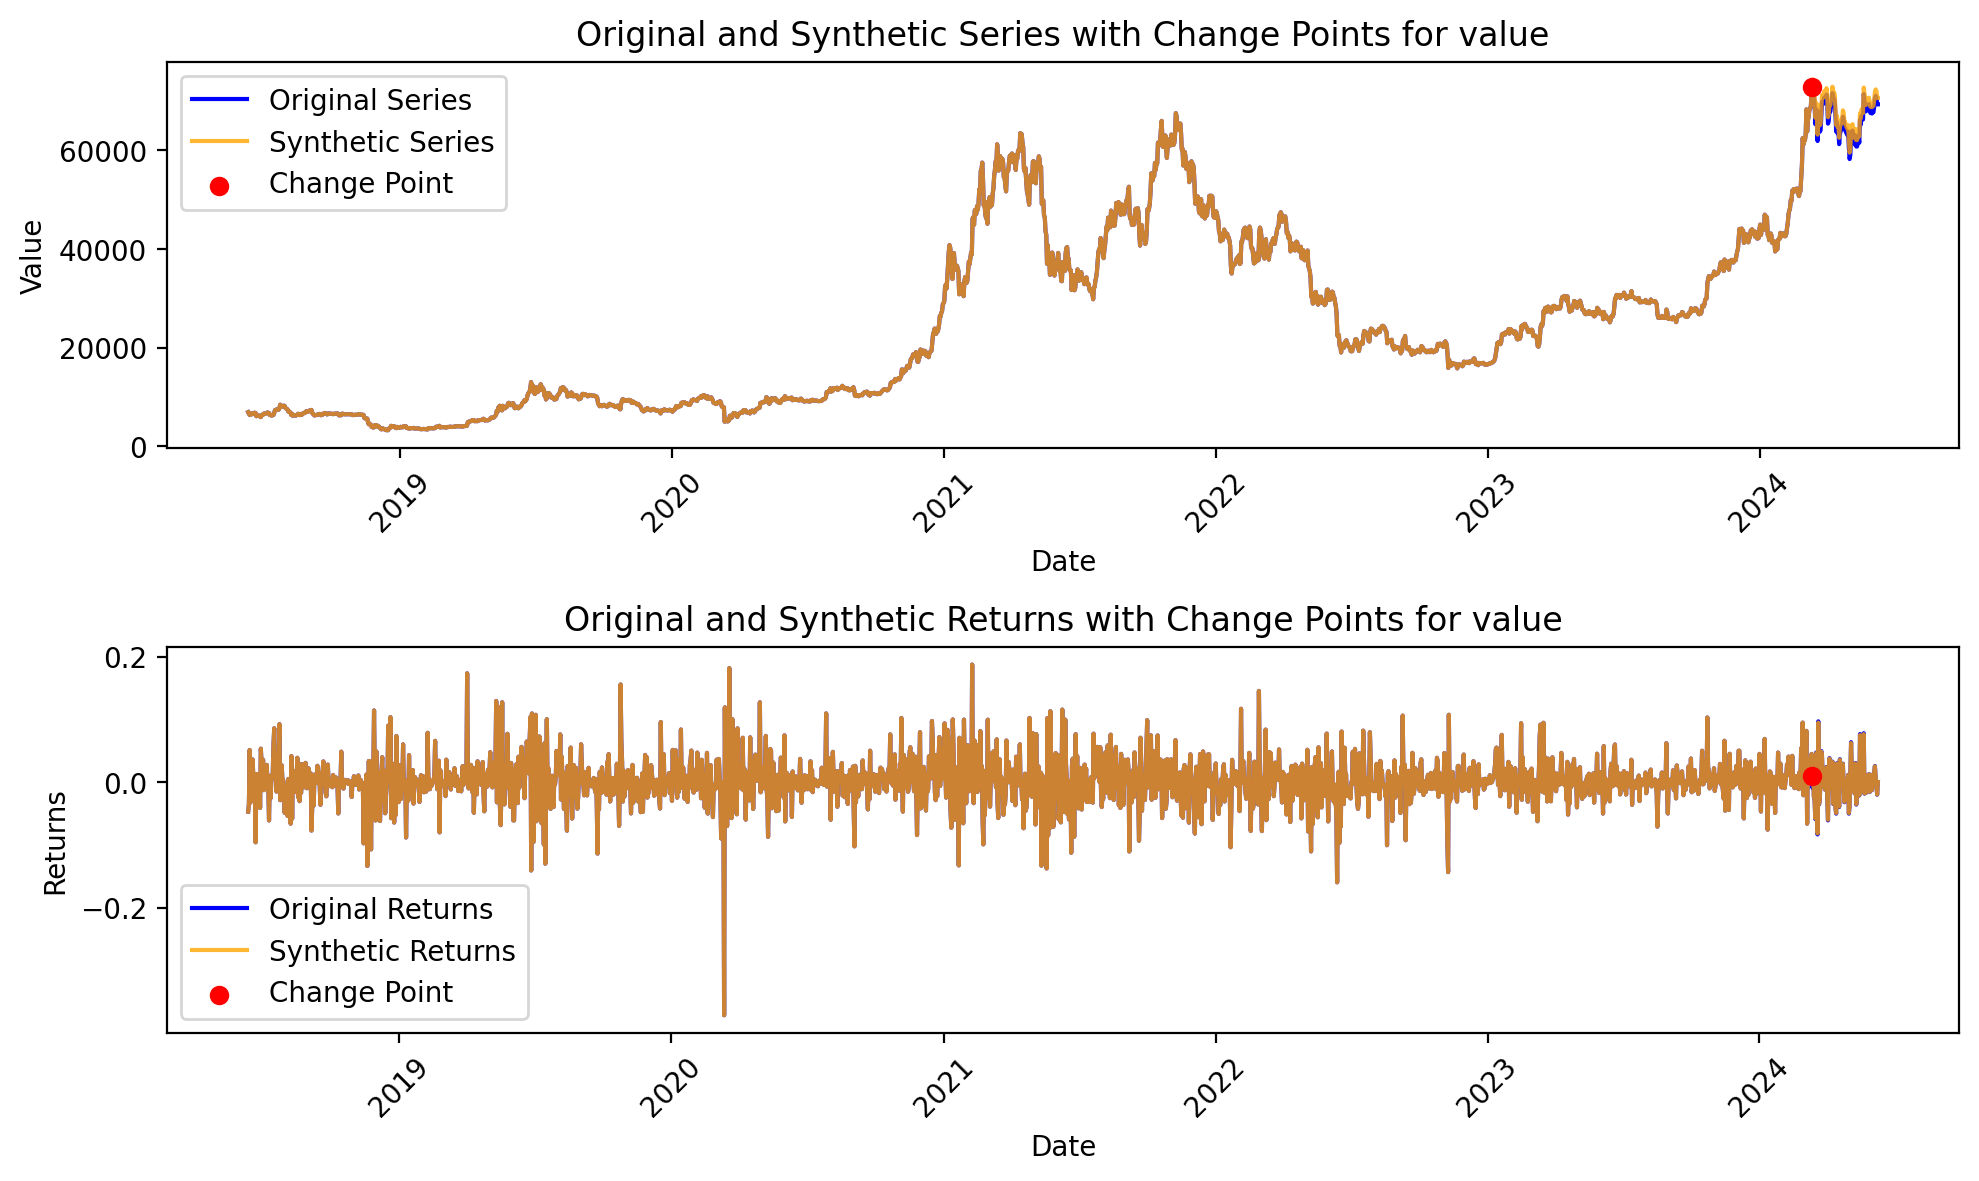

In [18]:
coin = 'BTC-USD'
synth = SyntheticDataGenerator()

for i in range(1,5):
    df = pd.DataFrame({'date': crypto_val['Date'].values, 'value': crypto_val[coin].values})
    
    returns_df, change_points_df, synthetic_values_df = synth.generate_change_points(df)
    num_change_points = change_points_df['value'].sum()
    synth.plot_series(df, synthetic_values_df, change_points_df)
    

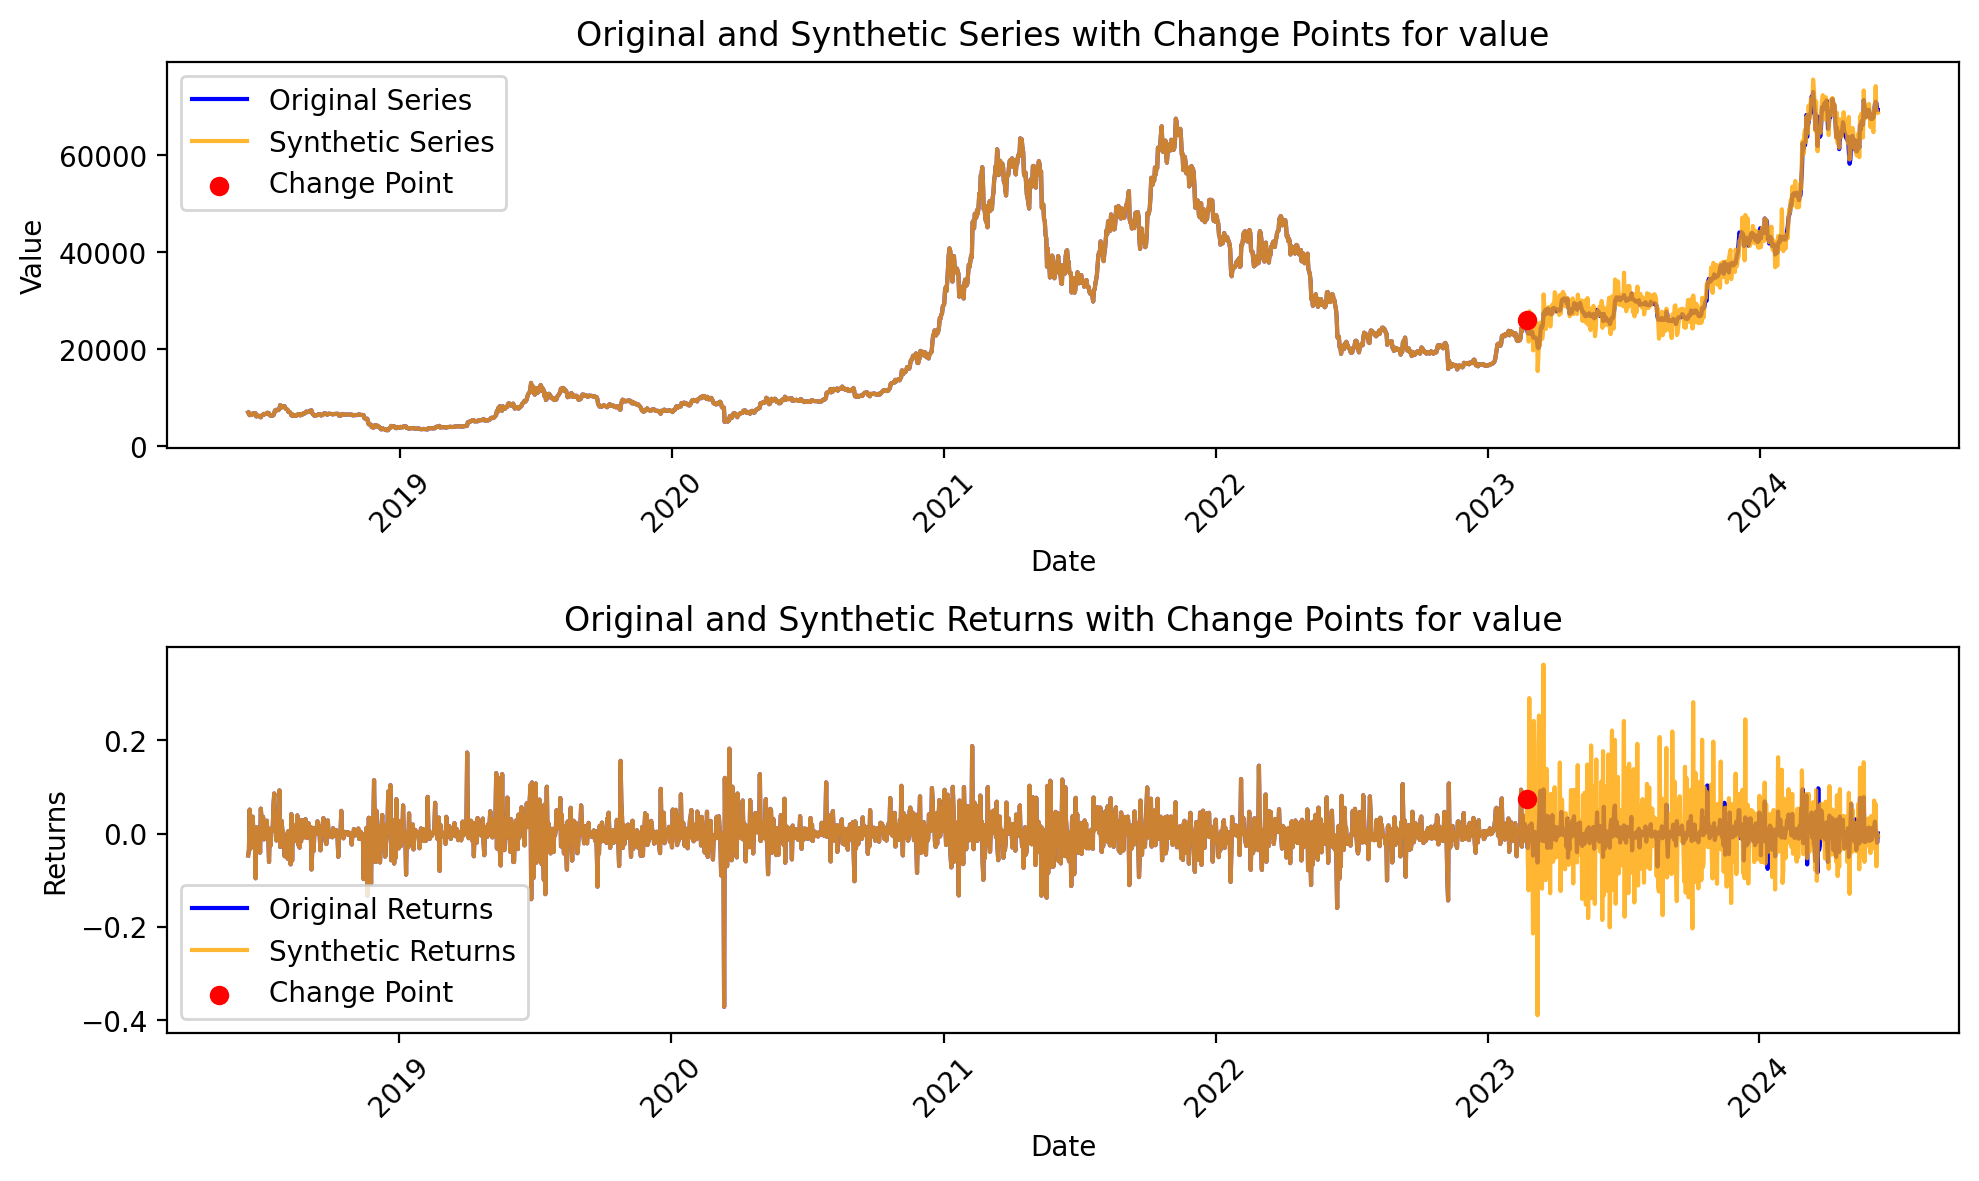

In [9]:
# returns_df.to_csv('btc_usd_ret.csv')
# change_points_df.to_csv('btc_usd_cp.csv')

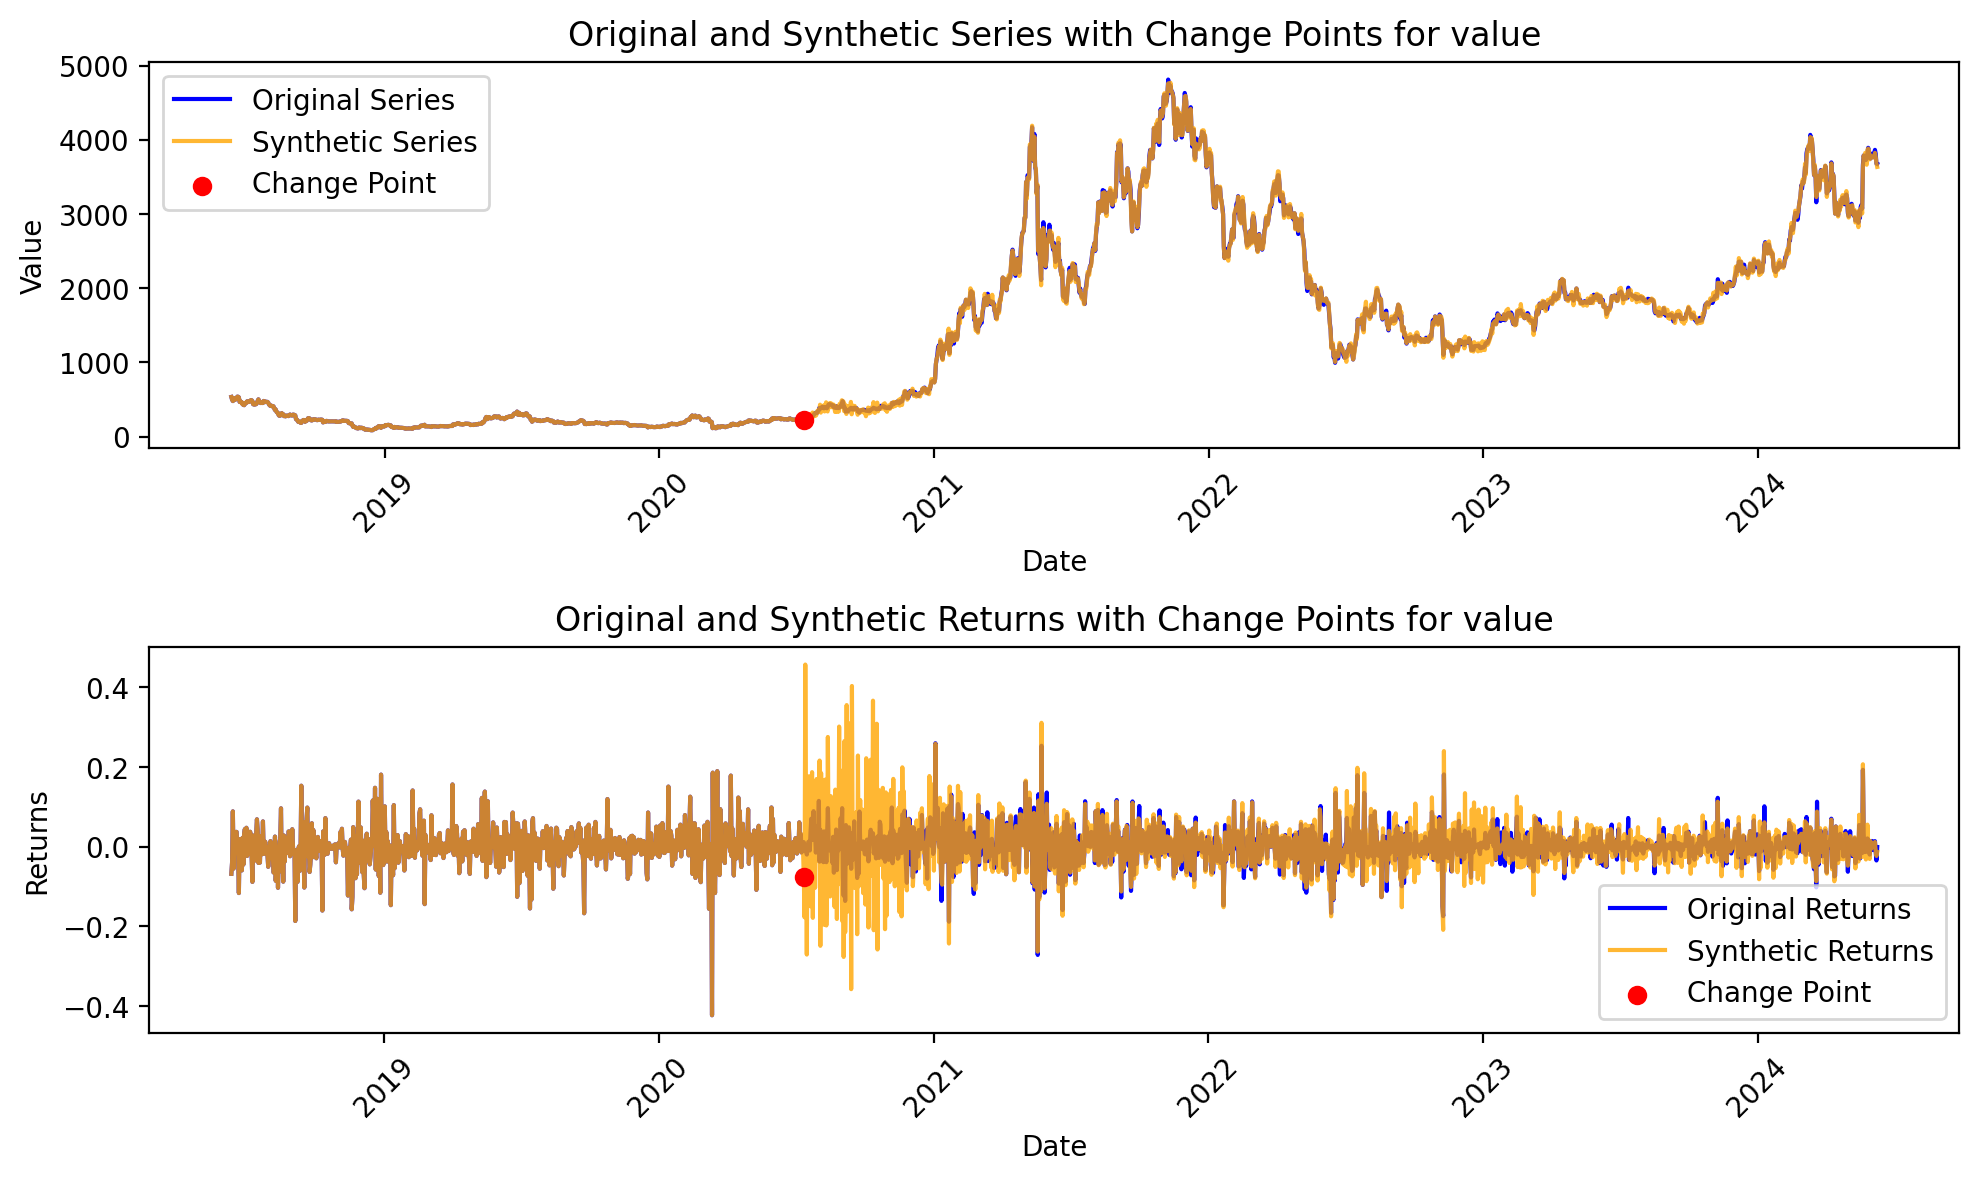

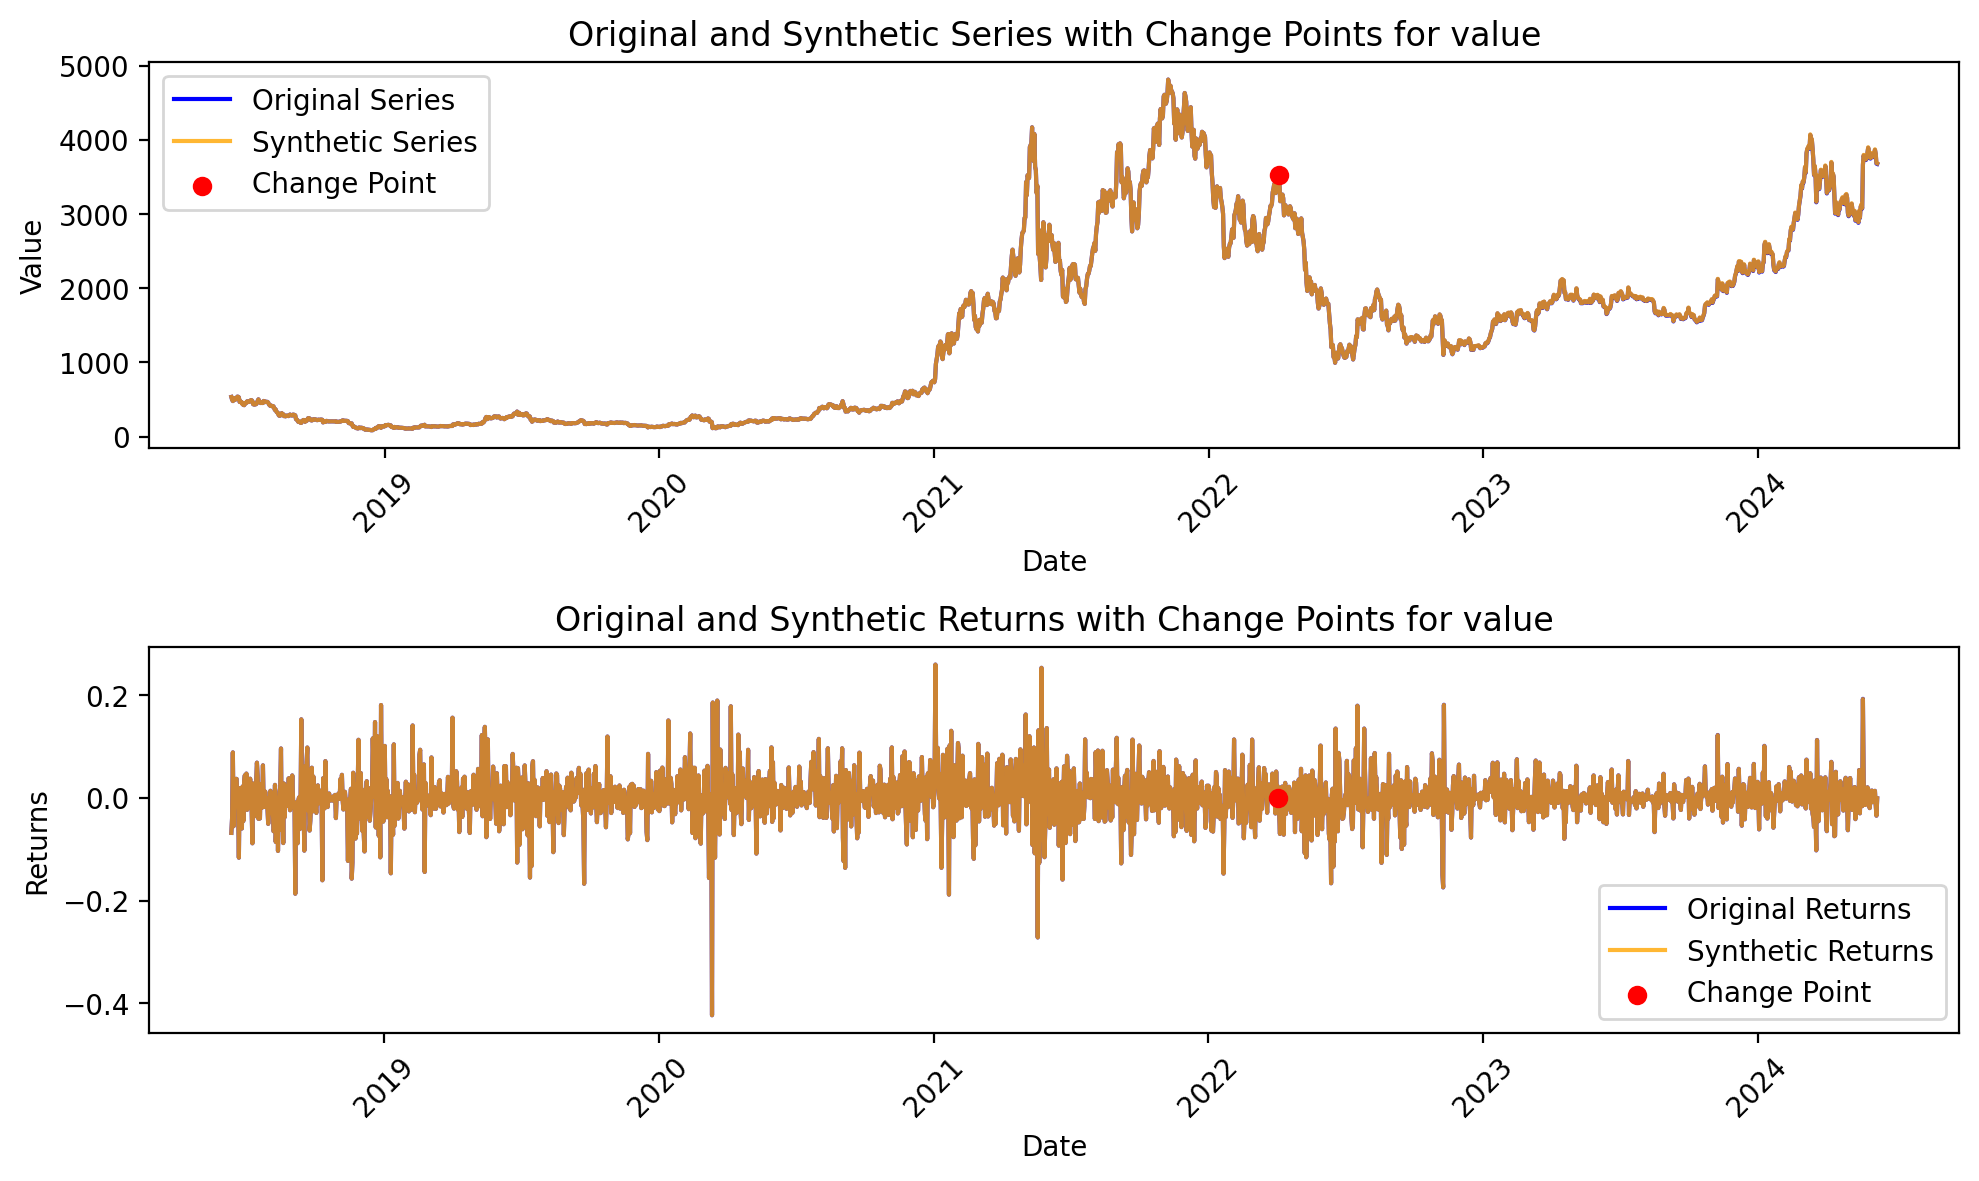

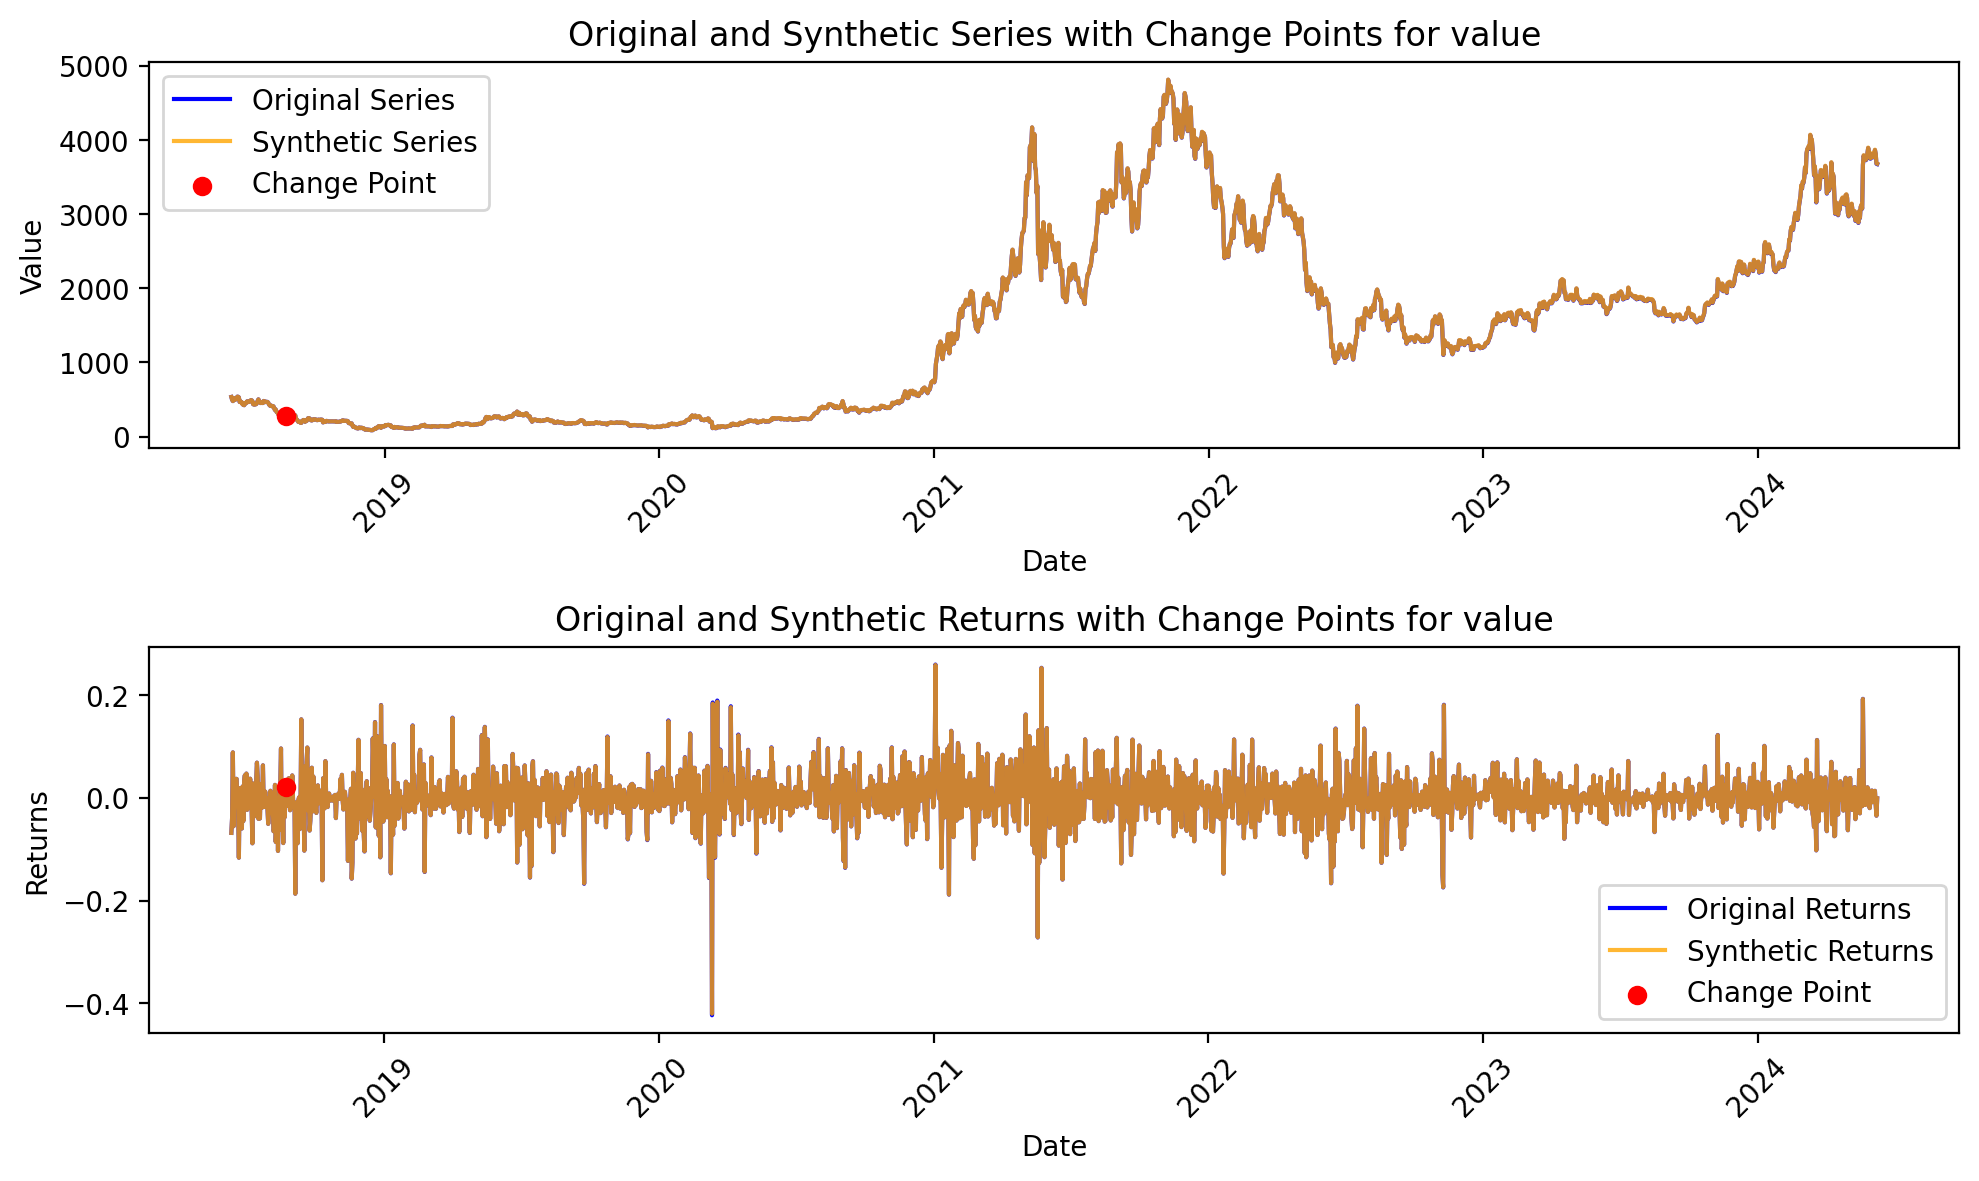

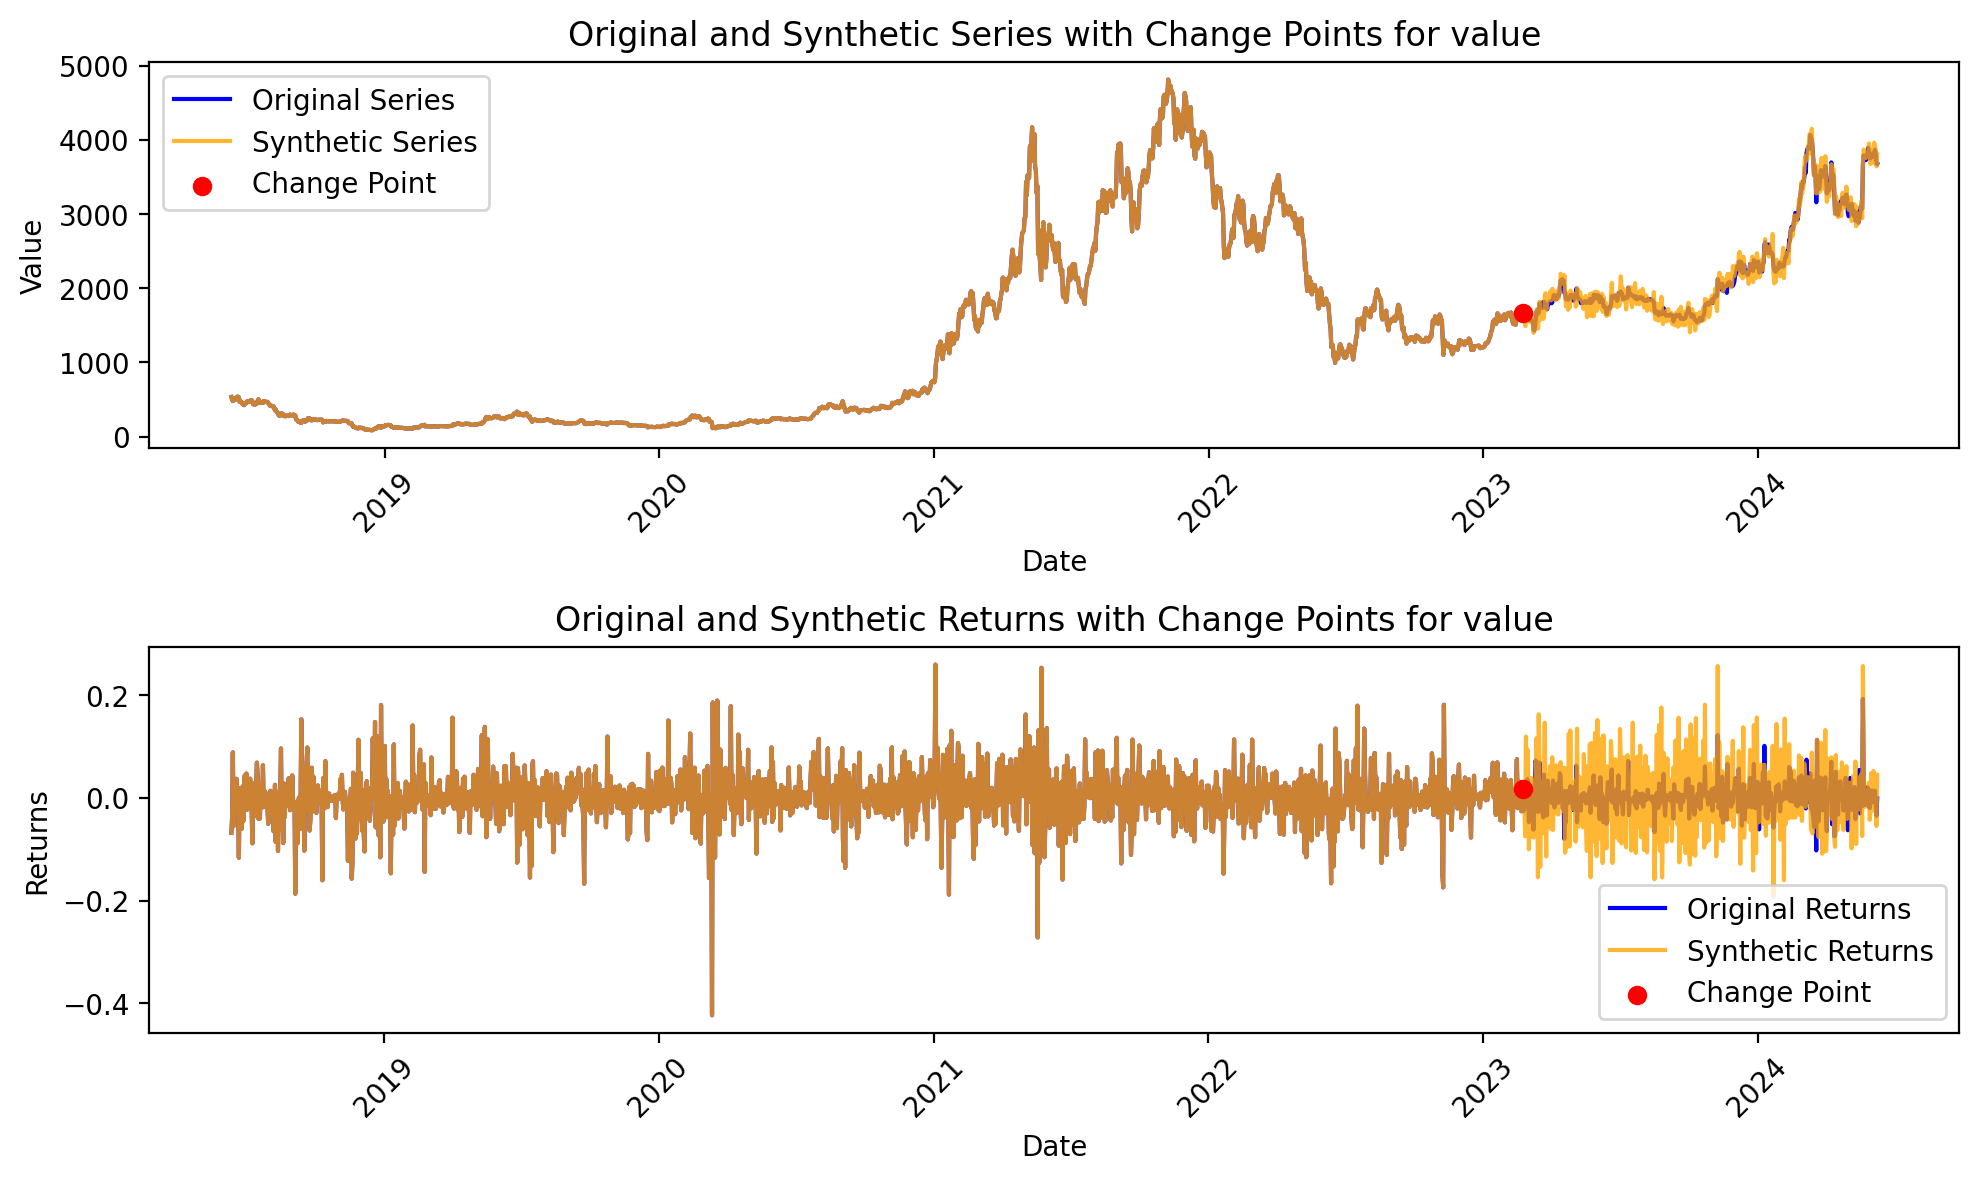

In [19]:
coin = 'ETH-USD'
synth = SyntheticDataGenerator()

for i in range(1,5):
    df = pd.DataFrame({'date': crypto_val['Date'].values, 'value': crypto_val[coin].values})
    
    returns_df, change_points_df, synthetic_values_df = synth.generate_change_points(df)
    num_change_points = change_points_df['value'].sum()
    synth.plot_series(df, synthetic_values_df, change_points_df)

In [20]:
# returns_df.to_csv('eth_usd_ret.csv')
# change_points_df.to_csv('eth_usd_cp.csv')

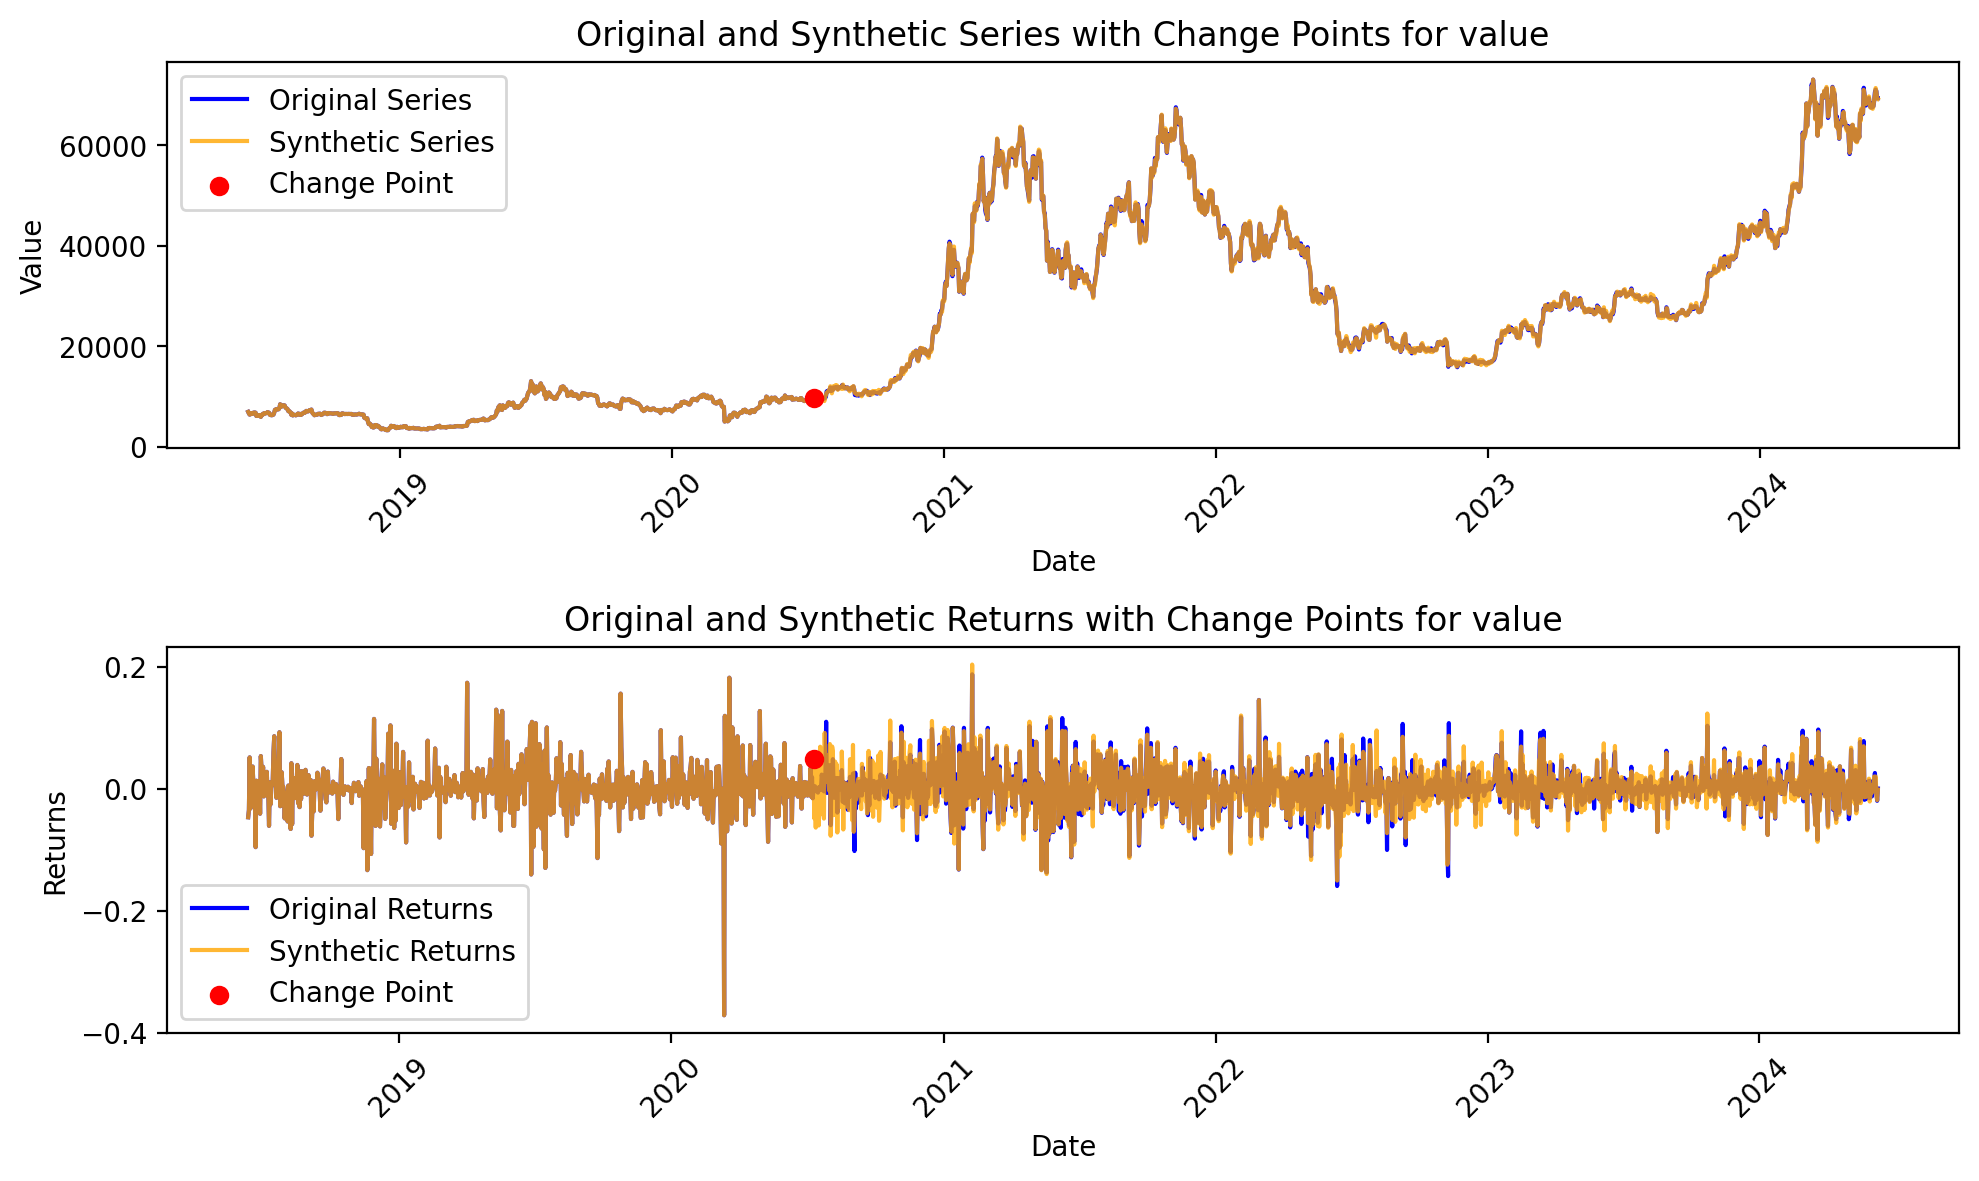

In [9]:
# crypto_val
coin = 'BTC-USD'
# np.random.seed(42)
synth = SyntheticDataGenerator()

for i in range(1,2):
    df = pd.DataFrame({'date': crypto_val['Date'].values, 'value': crypto_val[coin].values})
    
    returns_df, change_points_df, synthetic_values_df = synth.generate_change_points(df)
    num_change_points = change_points_df['value'].sum()
    synth.plot_series(df, synthetic_values_df, change_points_df)

### Датафрейм симуляционных данных с точками разладки

In [11]:
np.random.seed(42)
coins = list(crypto_val.drop(columns='Date').columns)
synth = SyntheticDataGenerator()

# для сохранения новых данных
all_synthetic_series = pd.DataFrame({'Date': crypto_val['Date']})
all_change_points = pd.DataFrame({'Date': crypto_val['Date']})
all_synthetic_returns_series = pd.DataFrame({'Date': crypto_val['Date']})


np.random.seed(42)
for i in coins:
    df = pd.DataFrame({'Date': crypto_val['Date'].values, 'value': crypto_val[i].values})

    returns_df, change_points_df, synthetic_values_df = synth.generate_change_points(df)
    num_change_points = change_points_df['value'].sum()
    
    change_points = change_points_df.value
    synthetic_values = synthetic_values_df.value
    returns_values = returns_df.value
    synthetic_values_df = pd.DataFrame({'Date': df.Date, 'value': synthetic_values})
    synthetic_returns_values_df = pd.DataFrame({'Date': df.Date, 'value': returns_values})
    change_points_df = pd.DataFrame({'Date': df.Date, 'change_point': change_points})

    # Добавляем к итоговому DataFrame
    all_synthetic_series[f'{i}'] = synthetic_values
    all_synthetic_returns_series[f'{i}'] = synthetic_returns_values_df.value
    all_change_points[f'{i}'] = change_points
    
all_synthetic_series.head()

,Date,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,DOGE-USD,ADA-USD,TRX-USD,LINK-USD,...,RVN-USD,TRAC-USD,SC-USD,ELF-USD,QTUM-USD,BAT-USD,LRC-USD,DASH-USD,DCR-USD,GAS-USD
0,2018-06-11,6906.919922,533.283997,1.00193,15.3835,0.604066,0.003234,0.181280,0.048829,0.262975,...,0.024359,0.154359,0.014462,0.793171,11.9838,0.233626,0.417903,271.809998,95.457001,15.369600
1,2018-06-12,6582.359863,496.842987,1.00077,15.2262,0.562933,0.003089,0.166585,0.043982,0.228636,...,0.023065,0.136330,0.012874,0.696955,11.2964,0.208202,0.364944,261.115997,86.651802,14.594567
2,2018-06-13,6349.899902,477.493988,1.00353,14.5891,0.534663,0.002817,0.160408,0.041533,0.214526,...,0.020475,0.123176,0.012091,0.663637,10.6549,0.195023,0.352978,245.957993,86.396500,13.597568
3,2018-06-14,6675.350098,519.742004,1.00395,14.8953,0.561306,0.002944,0.172375,0.045417,-0.000043,...,0.024670,0.153556,0.014151,0.693614,11.1763,0.219573,0.380893,268.321014,99.242798,14.727368
4,2018-06-15,6456.580078,491.003998,1.00695,15.0481,0.537707,0.002901,0.162747,0.042870,0.561032,...,0.024390,0.145590,0.013033,0.685285,10.7026,0.235921,0.361331,258.058014,91.035896,13.642668


In [16]:
# all_synthetic_series.to_csv('all_synthetic_series.csv')
# all_change_points.to_csv('all_change_points.csv')
# all_synthetic_returns_series.dropna().reset_index(drop=True).to_csv('all_synthetic_returns_series.csv')
# all_change_points.to_csv('all_change_points.csv')